## 0-3 Explore data

In [1]:
# Import process notbook
%run "0-2-eda-covid-process.ipynb"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 16 1490k   16  239k    0     0   145k      0  0:00:10  0:00:01  0:00:09  145k
 60 1490k   60  900k    0     0   351k      0  0:00:04  0:00:02  0:00:02  351k
 89 1490k   89 1326k    0     0   379k      0  0:00:03  0:00:03 --:--:--  379k
100 1490k  100 1490k    0     0   364k      0  0:00:04  0:00:04 --:--:--  364k


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 991 entries, Province/State to 10/4/22
dtypes: float64(2), int64(987), object(2)
memory usage: 2.2+ MB


### Read data

In [2]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [5]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285243 entries, 0 to 285242
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  285243 non-null  object
 1   date            285243 non-null  object
 2   value           285243 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.5+ MB


In [6]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Explore data

In [7]:
sns.set_style("whitegrid")

In [8]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

#### Appearance of new covid-19 cases in Latam

Subset data.

In [10]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


Plot time series.

In [11]:
import final_project.visualization.visualize as visualize

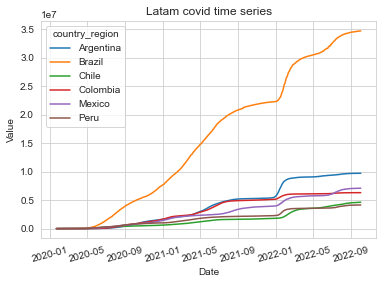

In [12]:
visualize.covid_time_series(some_latam_countries_df)

#### Latam in global context

Top `n` countries.

In [13]:
top_countries_df = (
    processed_covid_df
    .select_columns(["country_region", "value"])
    .groupby(["country_region"])
    .aggregate("sum")
    .sort_values("value", ascending=False)
    .reset_index()
    .head(20)
    .transform_column(
        column_name="country_region",
        function=lambda x: "red" if x in countries else "lightblue",
        dest_column_name="color"
    )
)

top_countries_df.head()

,country_region,value,color
0,US,38192997088,lightblue
1,India,22162493815,lightblue
2,Brazil,15581241166,red
3,France,10088911227,lightblue
4,United Kingdom,8322416774,lightblue


Plot to Latam in highlighted bars.

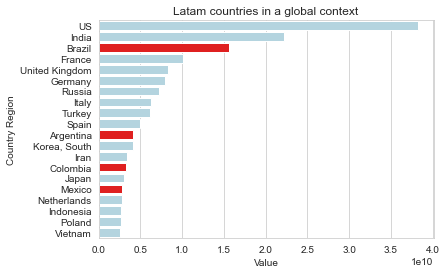

In [14]:
visualize.top_countries(top_countries_df)